In [3]:
pip install mysql-connector-python

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/16.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/16.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/16.4 MB ? eta -:--:--
    --------------------------------------- 0.3/16.4 MB ? eta -:--:--
   - -------------------------------------- 0.5/16.4 MB 882.6 kB/s eta 0:00:18
   - -------------------------------------- 0.5/16.4 MB 882.6 kB/s eta 0:00:18
   - -------------------------------------- 0.8/16.4 MB 699.0 kB/s eta 0:00:23
   - -------------------------------------- 0.8/16.4 MB 699.0 kB/s eta 0:00:23
   -- ------------------------------------- 1.0/16.4 MB 680.3 kB/s eta 0:00:23
   --- ------------------------------------ 1.3/16.4 MB 808.5 kB/s eta 0:00:19
   --- ------------------------------------ 1.6/16.4 MB 864.6 kB/s eta 0:00:18
   ----- ---------------------------------- 2.4/16.4 MB 1.1 MB/s eta 0:00:13
   ------- -

In [5]:
import mysql.connector
import pandas as pd

#Connect to server
cnx = mysql.connector.connect(
    host="127.0.0.1",
    port=3306,
    user="root",
    password="root")

In [7]:
query = "SELECT* FROM banking_case.customer"

In [9]:
df = pd.read_sql(query, cnx)

C:\Users\kajal singh\AppData\Local\Temp\ipykernel_20752\1600954950.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, cnx)


In [11]:
cnx.close()

In [15]:
df.head()

,ï»¿Client ID,Name,Age,Location ID,Joined Bank,Banking Contact,Nationality,Occupation,Fee Structure,Loyalty Classification,...,Bank Deposits,Checking Accounts,Saving Accounts,Foreign Currency Account,Business Lending,Properties Owned,Risk Weighting,BRId,GenderId,IAId
0,IND81288,Raymond Mills,24,34324,06-05-2019,Anthony Torres,American,Safety Technician IV,High,Jade,...,1485828.64,603617.88,607332.46,12249.96,1134475.30,1,2,1,1,1
1,IND65833,Julia Spencer,23,42205,10-12-2001,Jonathan Hawkins,African,Software Consultant,High,Jade,...,641482.79,229521.37,344635.16,61162.31,2000526.10,1,3,2,1,2
2,IND47499,Stephen Murray,27,7314,25-01-2010,Anthony Berry,European,Help Desk Operator,High,Gold,...,1033401.59,652674.69,203054.35,79071.78,548137.58,1,3,3,2,3
3,IND72498,Virginia Garza,40,34594,28-03-2019,Steve Diaz,American,Geologist II,Mid,Silver,...,1048157.49,1048157.49,234685.02,57513.65,1148402.29,0,4,4,1,4
4,IND60181,Melissa Sanders,46,41269,20-07-2012,Shawn Long,American,Assistant Professor,Mid,Platinum,...,487782.53,446644.25,128351.45,30012.14,1674412.12,0,3,1,2,5


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [21]:
df.shape

(3000, 25)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ï»¿Client ID              3000 non-null   object 
 1   Name                      3000 non-null   object 
 2   Age                       3000 non-null   int64  
 3   Location ID               3000 non-null   int64  
 4   Joined Bank               3000 non-null   object 
 5   Banking Contact           3000 non-null   object 
 6   Nationality               3000 non-null   object 
 7   Occupation                3000 non-null   object 
 8   Fee Structure             3000 non-null   object 
 9   Loyalty Classification    3000 non-null   object 
 10  Estimated Income          3000 non-null   float64
 11  Superannuation Savings    3000 non-null   float64
 12  Amount of Credit Cards    3000 non-null   int64  
 13  Credit Card Balance       3000 non-null   float64
 14  Bank Loa

In [25]:
#Generative Descriptive step for the dataframe
df.describe()

,Age,Location ID,Estimated Income,Superannuation Savings,Amount of Credit Cards,Credit Card Balance,Bank Loans,Bank Deposits,Checking Accounts,Saving Accounts,Foreign Currency Account,Business Lending,Properties Owned,Risk Weighting,BRId,GenderId,IAId
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3000.000000,3.000000e+03,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,51.039667,21563.323000,171305.034263,25531.599673,1.463667,3176.206943,5.913862e+05,6.715602e+05,3.210929e+05,2.329084e+05,29883.529993,8.667598e+05,1.518667,2.249333,2.559333,1.504000,10.425333
std,19.854760,12462.273017,111935.808209,16259.950770,0.676387,2497.094709,4.575570e+05,6.457169e+05,2.820796e+05,2.300078e+05,23109.924010,6.412303e+05,1.102145,1.131191,1.007713,0.500067,5.988242
min,17.000000,12.000000,15919.480000,1482.030000,1.000000,1.170000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,45.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,1.000000
25%,34.000000,10803.500000,82906.595000,12513.775000,1.000000,1236.630000,2.396281e+05,2.044004e+05,1.199475e+05,7.479440e+04,11916.542500,3.748251e+05,1.000000,1.000000,2.000000,1.000000,5.000000
50%,51.000000,21129.500000,142313.480000,22357.355000,1.000000,2560.805000,4.797934e+05,4.633165e+05,2.428157e+05,1.640866e+05,24341.190000,7.113147e+05,2.000000,2.000000,3.000000,2.000000,10.000000
75%,69.000000,32054.500000,242290.305000,35464.740000,2.000000,4522.632500,8.258130e+05,9.427546e+05,4.348749e+05,3.155750e+05,41966.392500,1.185110e+06,2.000000,3.000000,3.000000,2.000000,15.000000
max,85.000000,43369.000000,522330.260000,75963.900000,3.000000,13991.990000,2.667557e+06,3.890598e+06,1.969923e+06,1.724118e+06,124704.870000,3.825962e+06,3.000000,5.000000,4.000000,2.000000,22.000000


<Axes: xlabel='Income Band'>

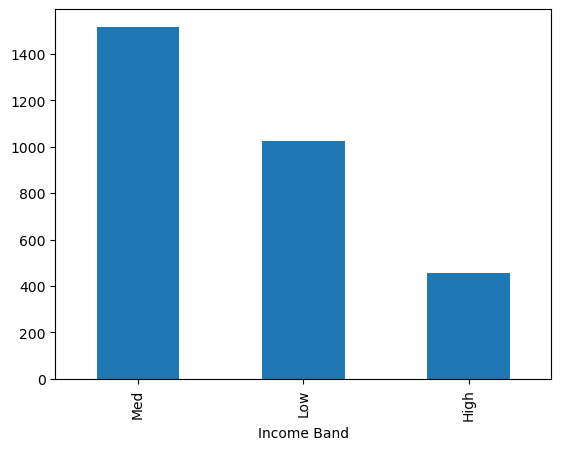

In [55]:
bins = [0, 100000, 300000, float('inf')]
label = ['Low', 'Med', 'High']

df['Income Band'] = pd.cut(df["Estimated Income"], bins=bins, labels=labels, right=False)
df['Income Band'].value_counts().plot(kind='bar')

# 📊 Univariate Analysis


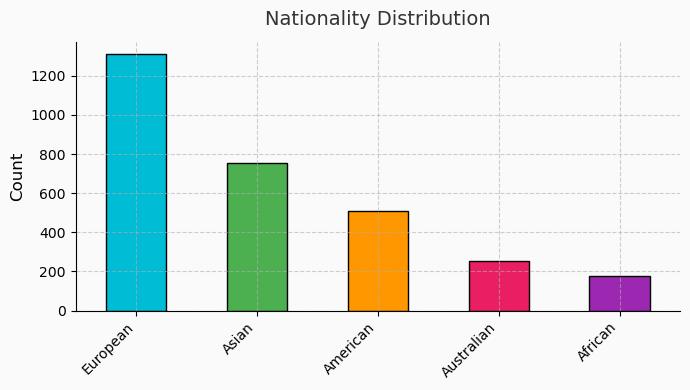


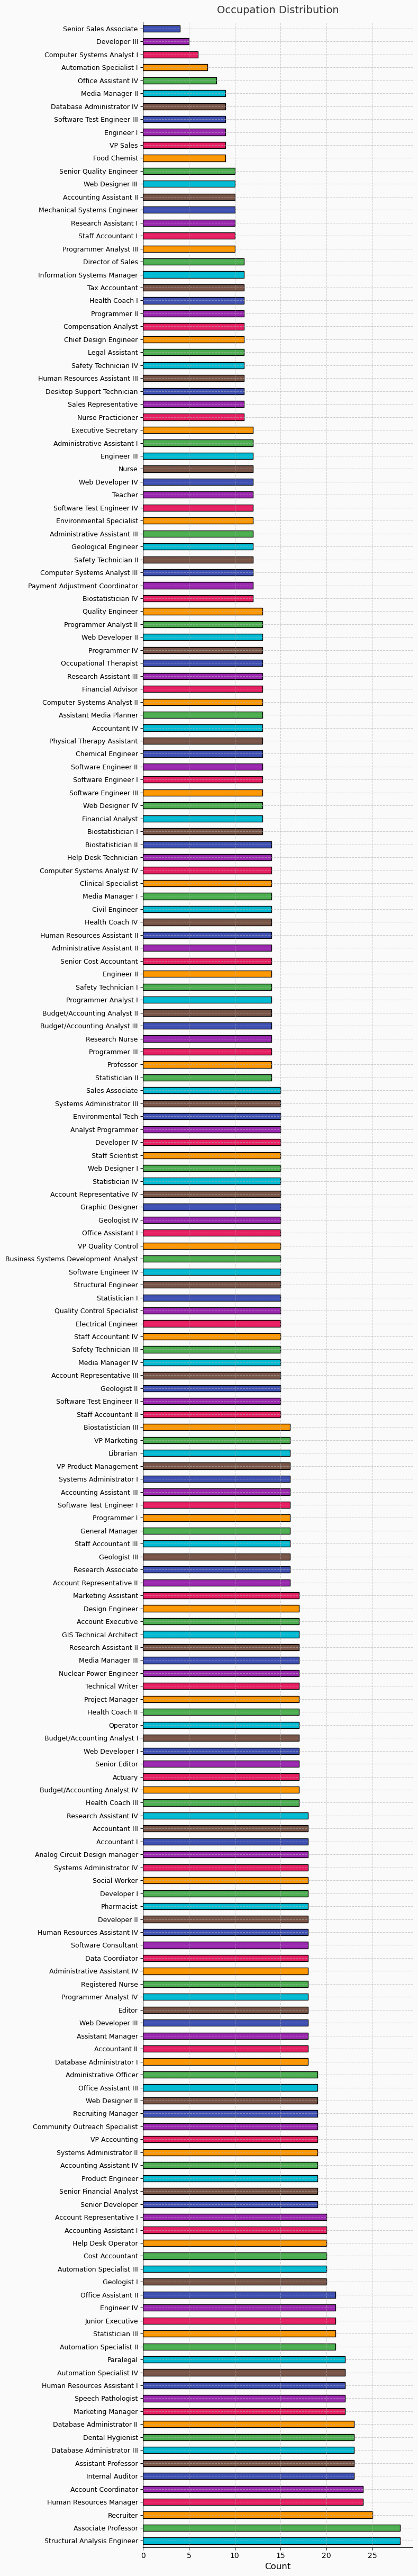


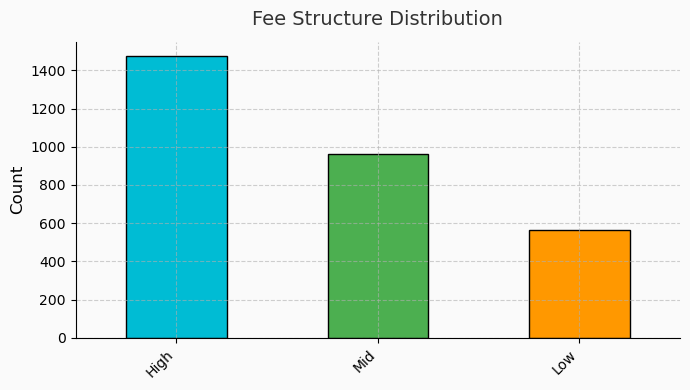


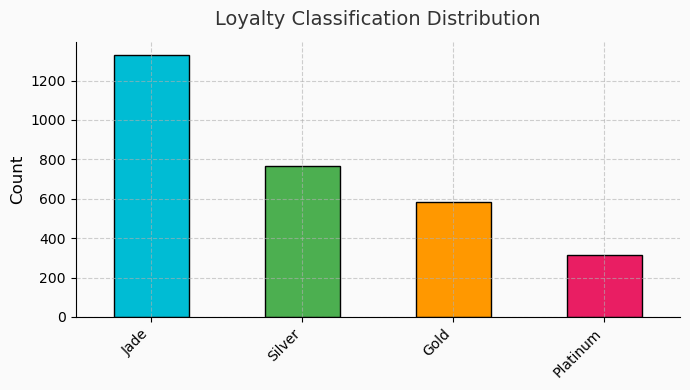


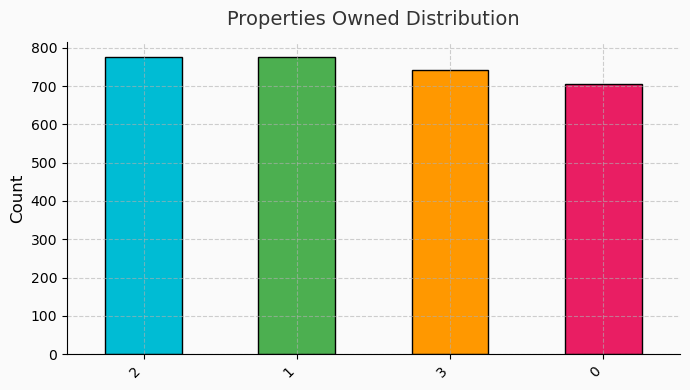


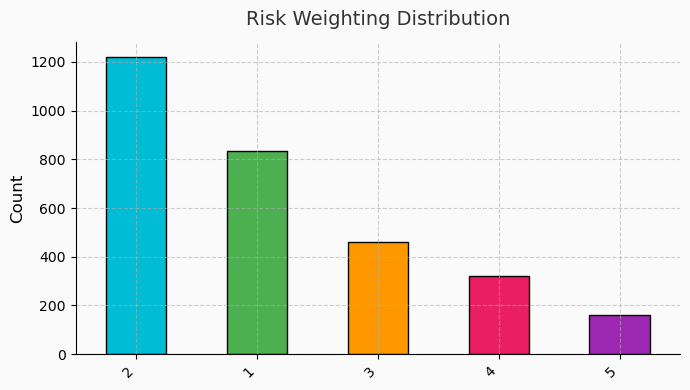


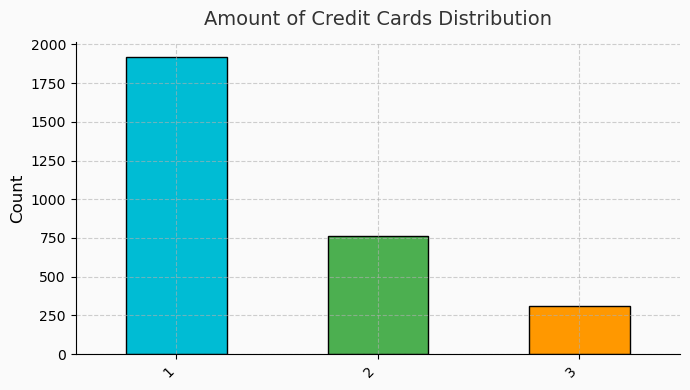


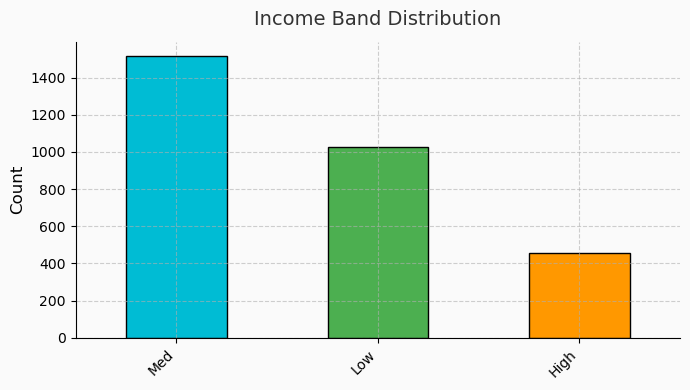


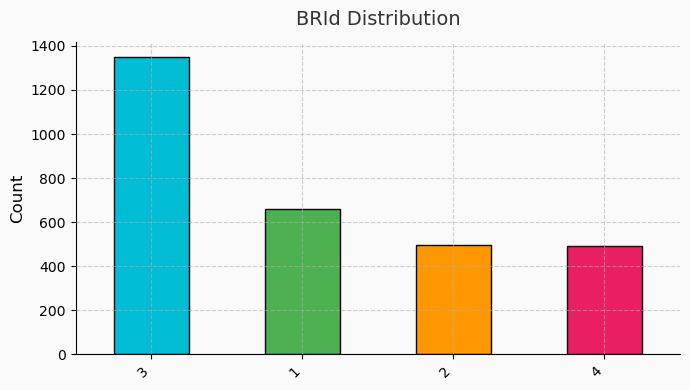


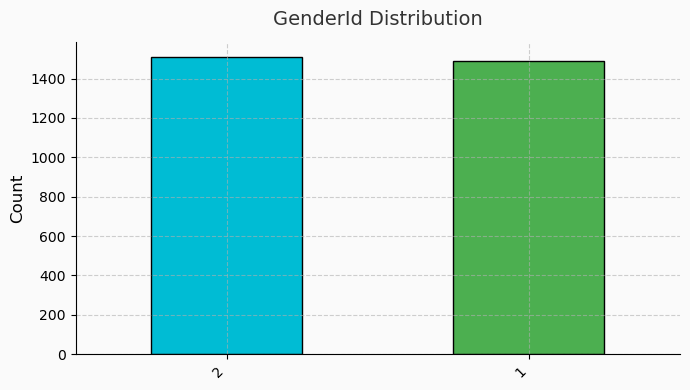


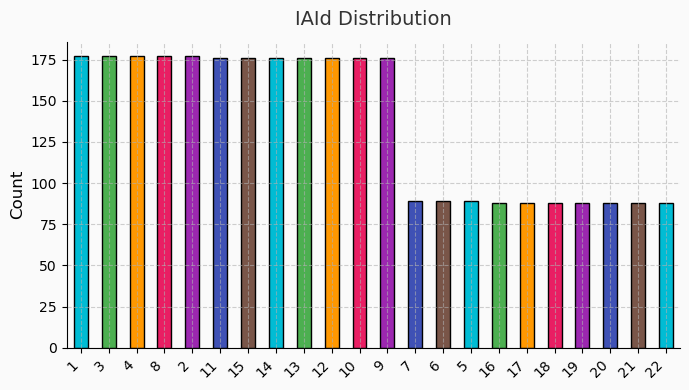

In [82]:
import matplotlib.pyplot as plt
from IPython.display import display, HTML
import io
import base64

# Define a visually appealing color palette
color_palette = ['#00bcd4', '#4caf50', '#ff9800', '#e91e63', '#9c27b0', '#3f51b5', '#795548']

# List of categorical columns
categorical_columns = ["Nationality", "Occupation", "Fee Structure", "Loyalty Classification", 
                       "Properties Owned", "Risk Weighting", "Amount of Credit Cards", 
                       "Income Band", "BRId", "GenderId", "IAId"]

for col in categorical_columns:
    value_counts = df[col].value_counts()

    # Set horizontal bar chart for Occupation
    if col == "Occupation":
        fig, ax = plt.subplots(figsize=(8, len(value_counts) * 0.25))  # dynamic height
        bars = value_counts.plot(kind='barh', ax=ax, color=color_palette * (len(value_counts) // len(color_palette) + 1), edgecolor='black')
        ax.set_xlabel('Count', fontsize=12)
        ax.set_ylabel('')
        plt.yticks(fontsize=9)
    else:
        fig, ax = plt.subplots(figsize=(7, 4))
        bars = value_counts.plot(kind='bar', ax=ax, color=color_palette * (len(value_counts) // len(color_palette) + 1), edgecolor='black')
        ax.set_ylabel('Count', fontsize=12)
        ax.set_xlabel('')
        plt.xticks(rotation=45, ha='right', fontsize=10)

    # Common styling
    ax.set_title(f"{col} Distribution", fontsize=14, color="#333", pad=12)
    ax.spines[['top', 'right']].set_visible(False)
    ax.grid(axis='both', linestyle='--', alpha=0.6)
    ax.set_facecolor("#fafafa")
    plt.tight_layout()

    # Save plot to buffer
    buffer = io.BytesIO()
    plt.savefig(buffer, format='png', bbox_inches='tight', facecolor='#fafafa')
    buffer.seek(0)
    image_base64 = base64.b64encode(buffer.read()).decode('utf-8')
    buffer.close()
    plt.close(fig)

    # Styled HTML output with embedded chart
    html_output = f"""
    <div style='border:1px solid #ddd; padding:15px; margin:15px 0; border-radius:10px;
                background:linear-gradient(to right, #ffffff, #f9f9f9); box-shadow: 0 2px 8px rgba(0,0,0,0.05);'>
        <h3 style='font-family:sans-serif; color:#222;'>{col} – Bar Chart</h3>
        <img src='data:image/png;base64,{image_base64}' style='max-width:100%; height:auto;'/>
    </div>
    """
    display(HTML(html_output))


# 🔁 Bivariate Analysis

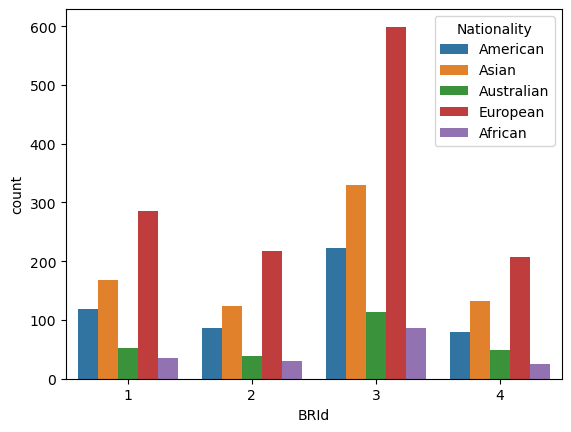

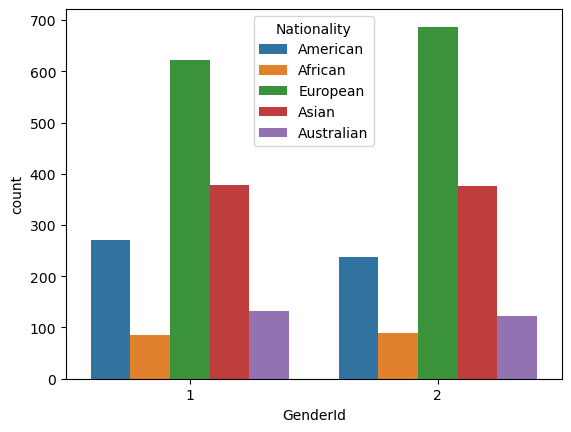

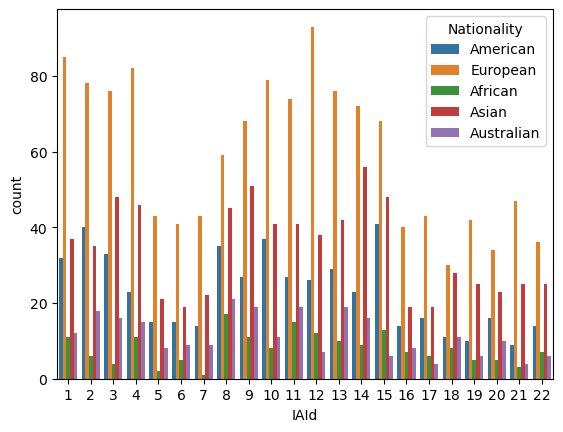

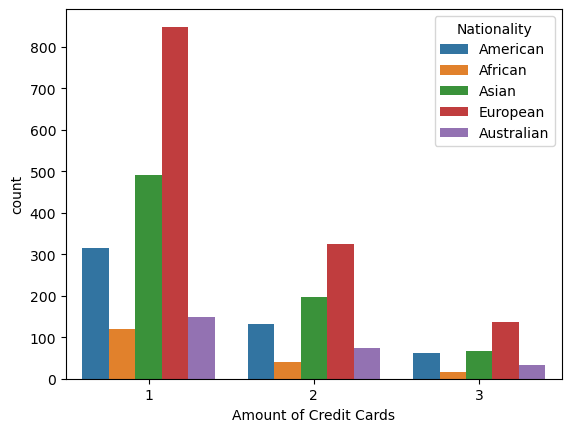

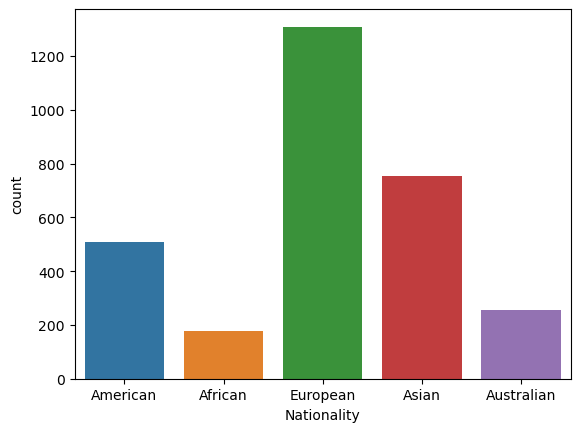

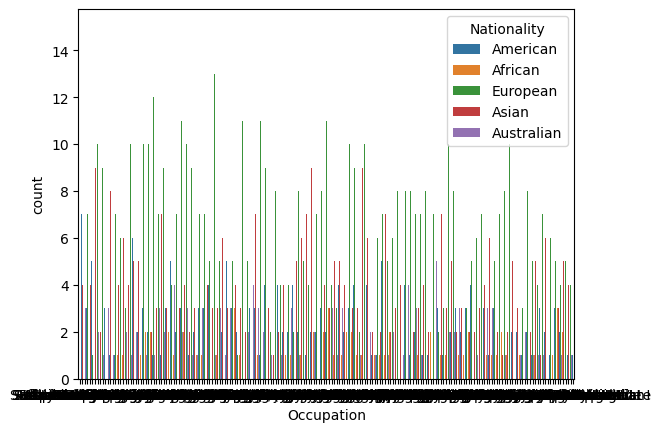

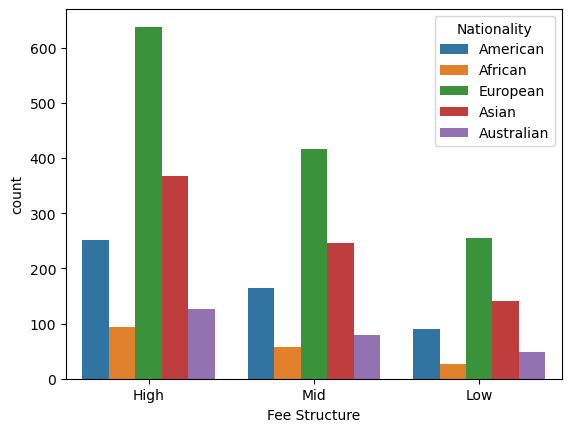

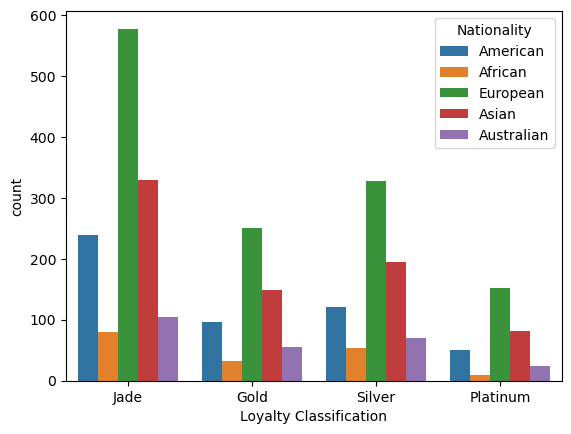

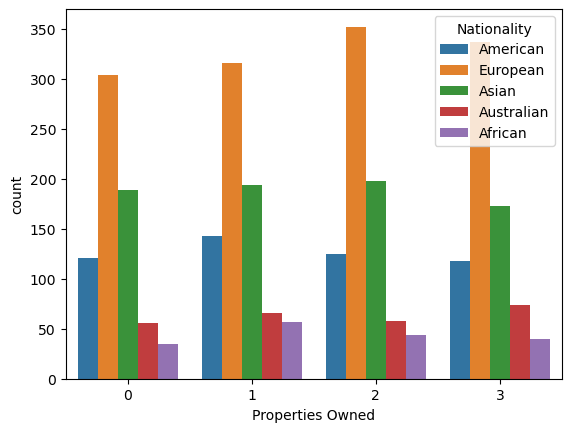

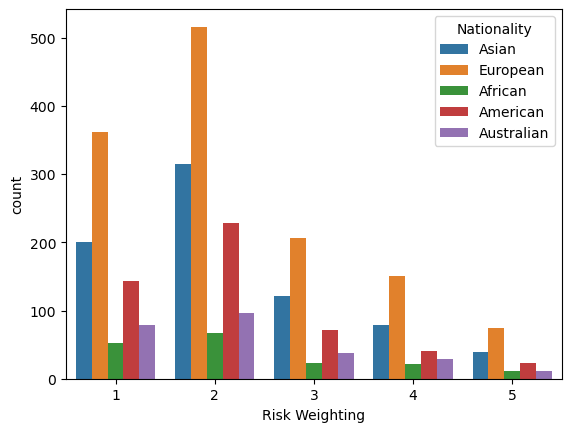

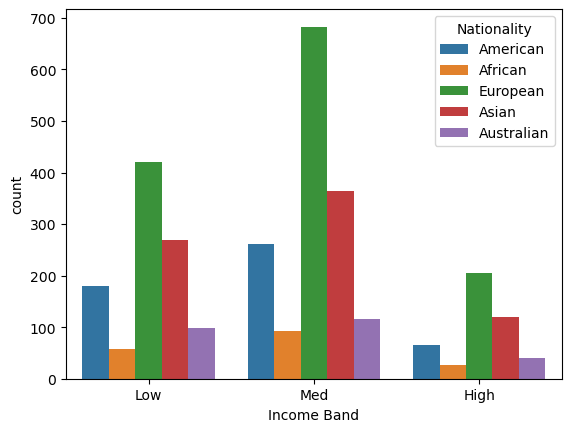

In [87]:
for i, predictor in enumerate(df[["BRId", "GenderId", "IAId", "Amount of Credit Cards", "Nationality", "Occupation", "Fee Structure", "Loyalty Classification", "Properties Owned", "Risk Weighting", "Income Band"]].columns):
    plt.figure(i)
    sns.countplot(data=df, x=predictor, hue='Nationality')

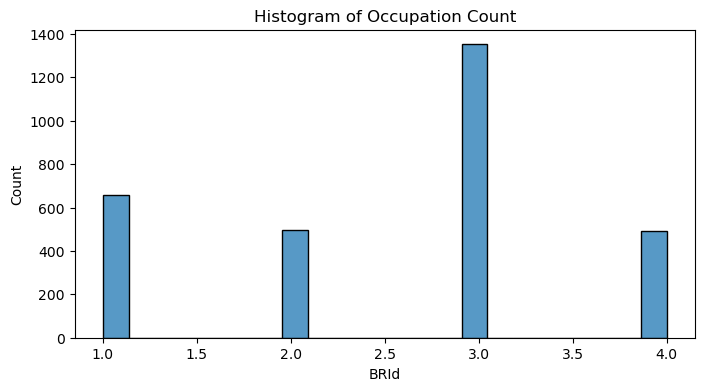

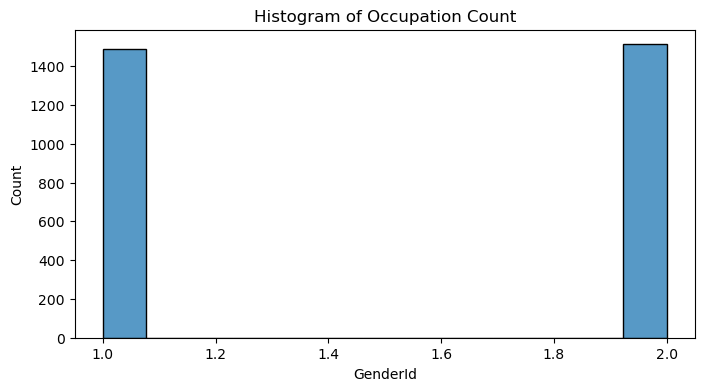

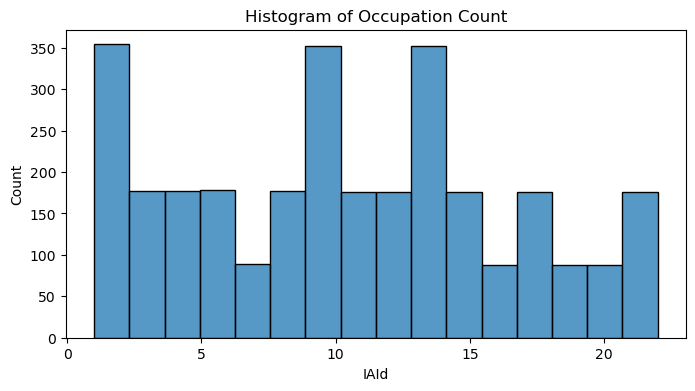

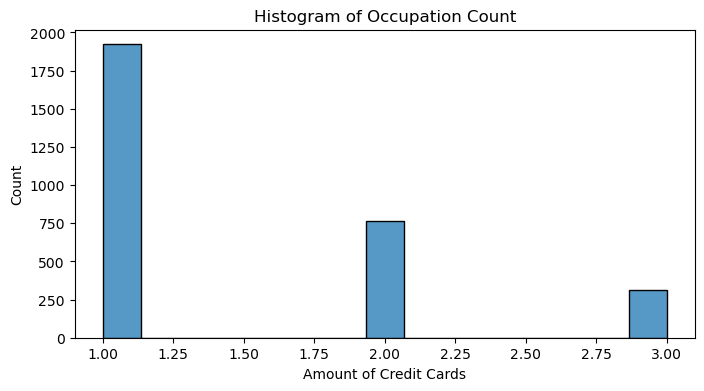

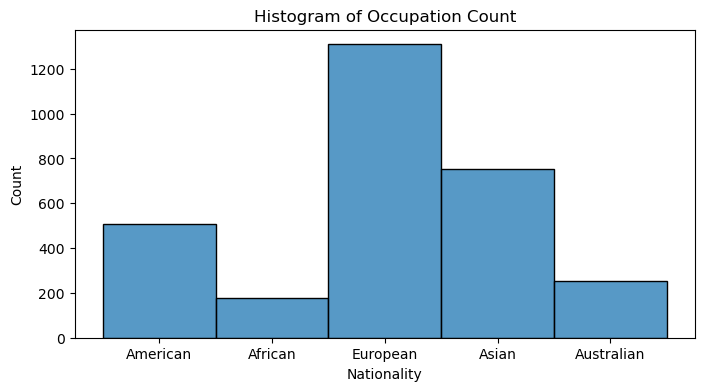

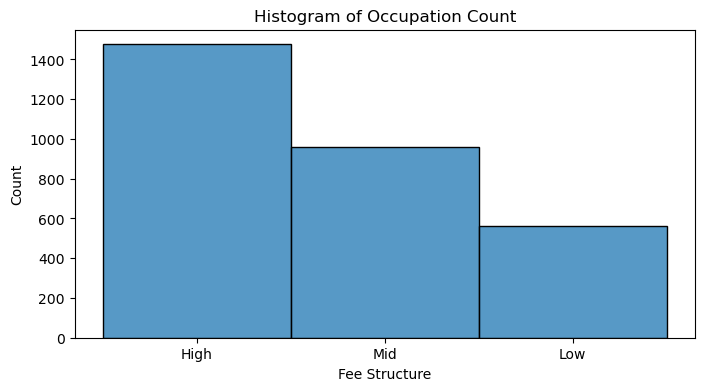

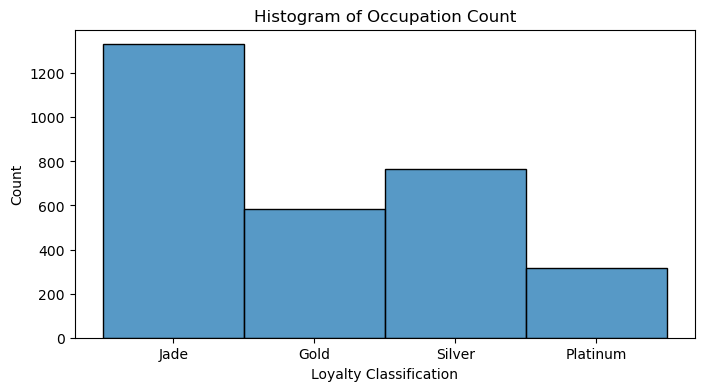

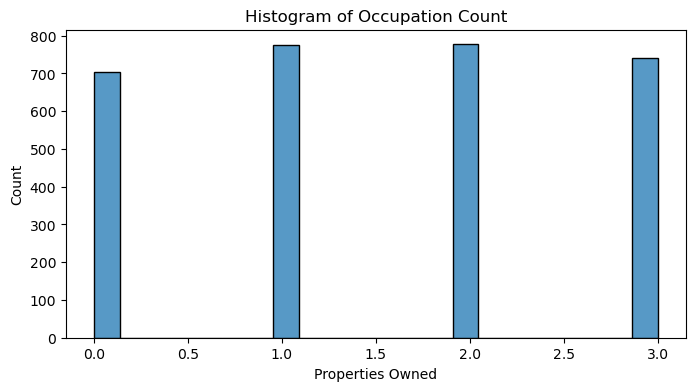

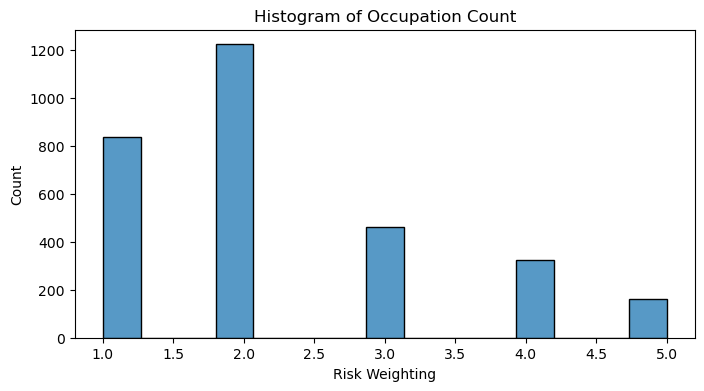

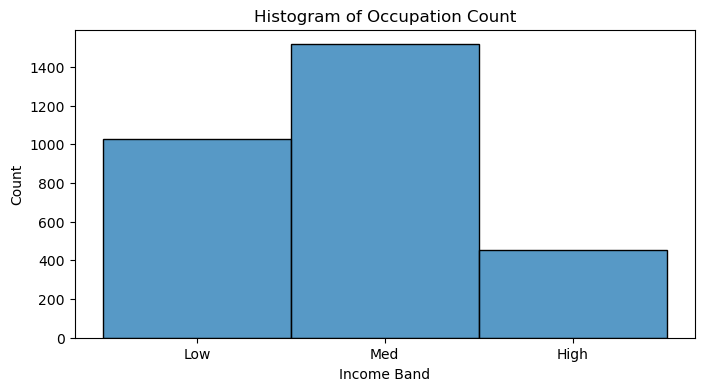

In [89]:
#Histplot of values counts for diffrent occupation
for col in categorical_cols:
    if col == "Occupation":
        continue
    plt.figure(figsize=(8,4))
    sns.histplot(df[col])
    plt.title("Histogram of Occupation Count")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

# Numerical Analysis

C:\Users\kajal singh\AppData\Local\Temp\ipykernel_20752\1632595270.py:26: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout(pad=3.0)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


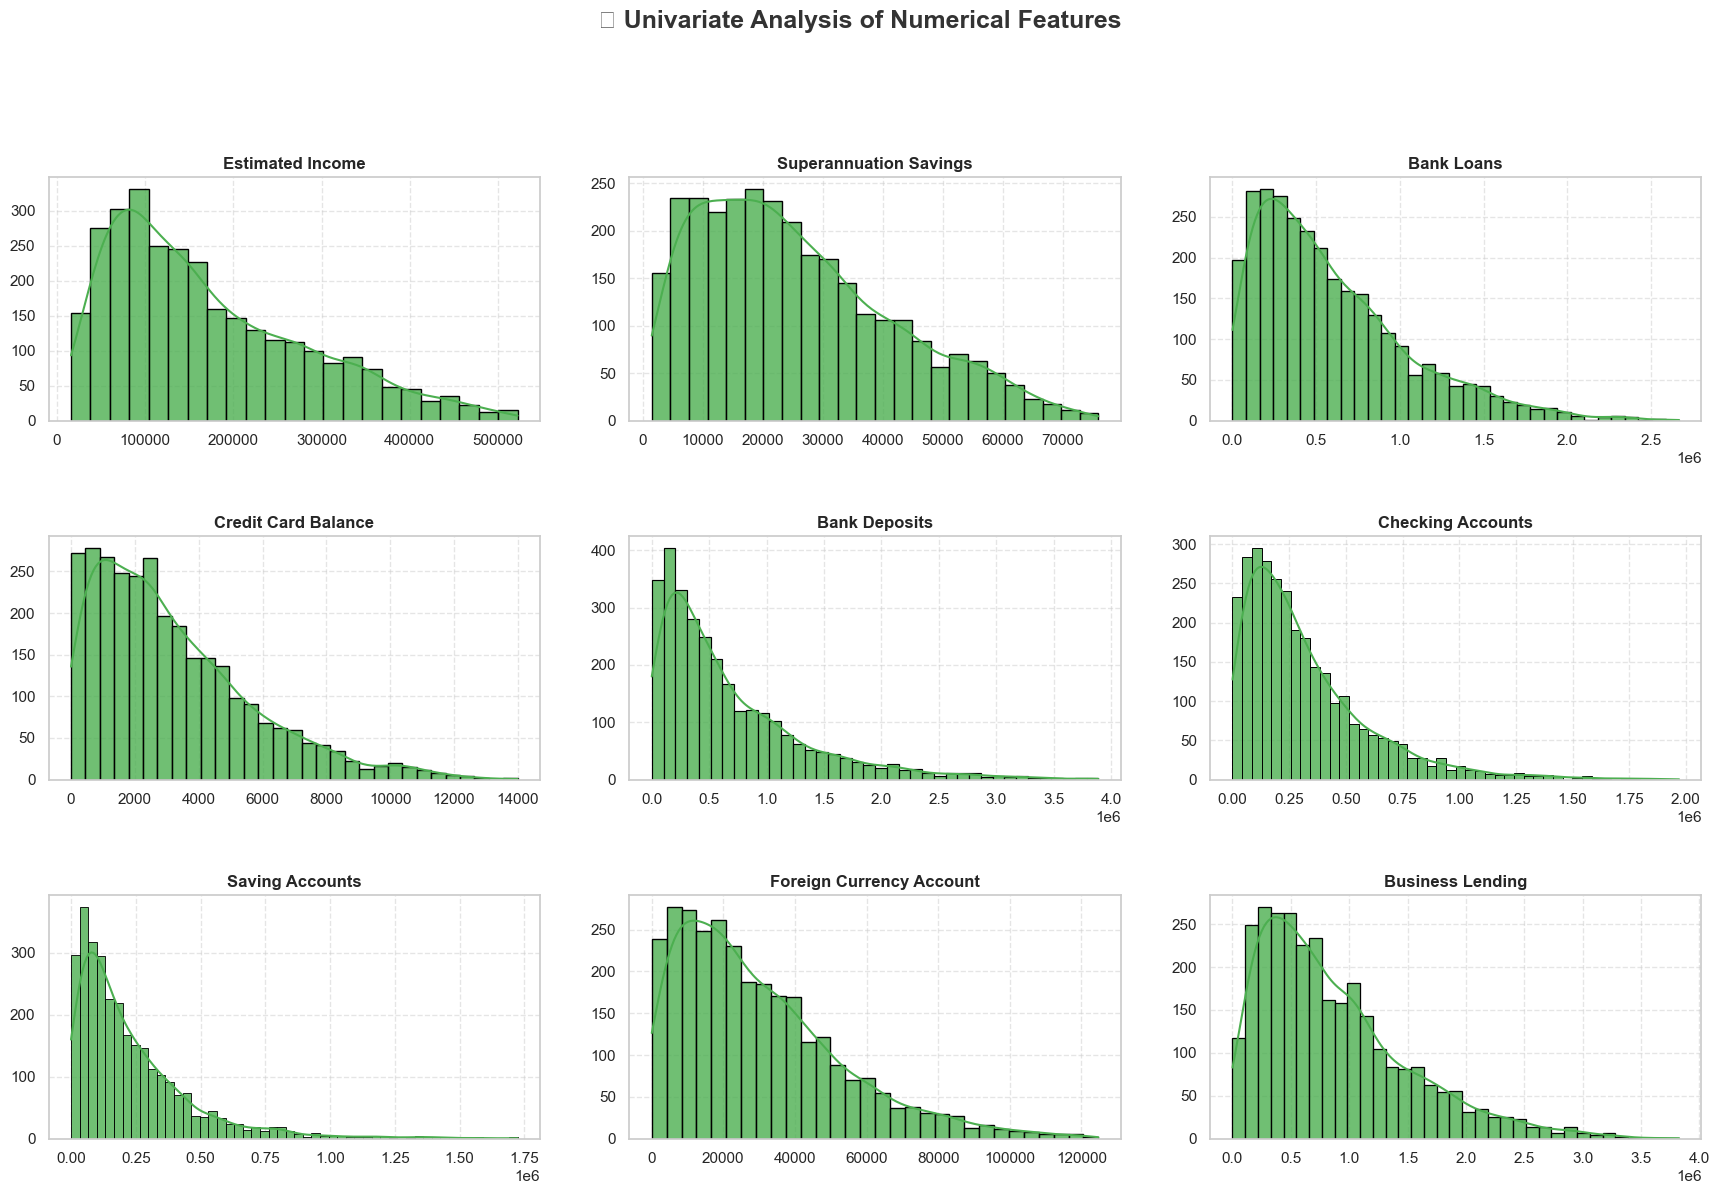

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns

# Apply seaborn style
sns.set(style="whitegrid", palette="pastel")

# Numerical columns
numerical_cols = [
    'Estimated Income', 'Superannuation Savings', 'Bank Loans', 'Credit Card Balance',
    'Bank Deposits', 'Checking Accounts', 'Saving Accounts', 'Foreign Currency Account',
    'Business Lending'
]

# Set up the figure
plt.figure(figsize=(18, 12))
plt.suptitle('📊 Univariate Analysis of Numerical Features', fontsize=18, fontweight='bold', color='#333', y=1.02)

# Plot each histogram with KDE
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i+1)
    sns.histplot(df[col], kde=True, color='#4caf50', edgecolor='black', alpha=0.8)
    plt.title(col, fontsize=12, fontweight='bold')
    plt.xlabel('')
    plt.ylabel('')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout(pad=3.0)

plt.show()


# HeatMaps

C:\Users\kajal singh\AppData\Local\Temp\ipykernel_20752\2260865387.py:19: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) Arial.
  plt.tight_layout()
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


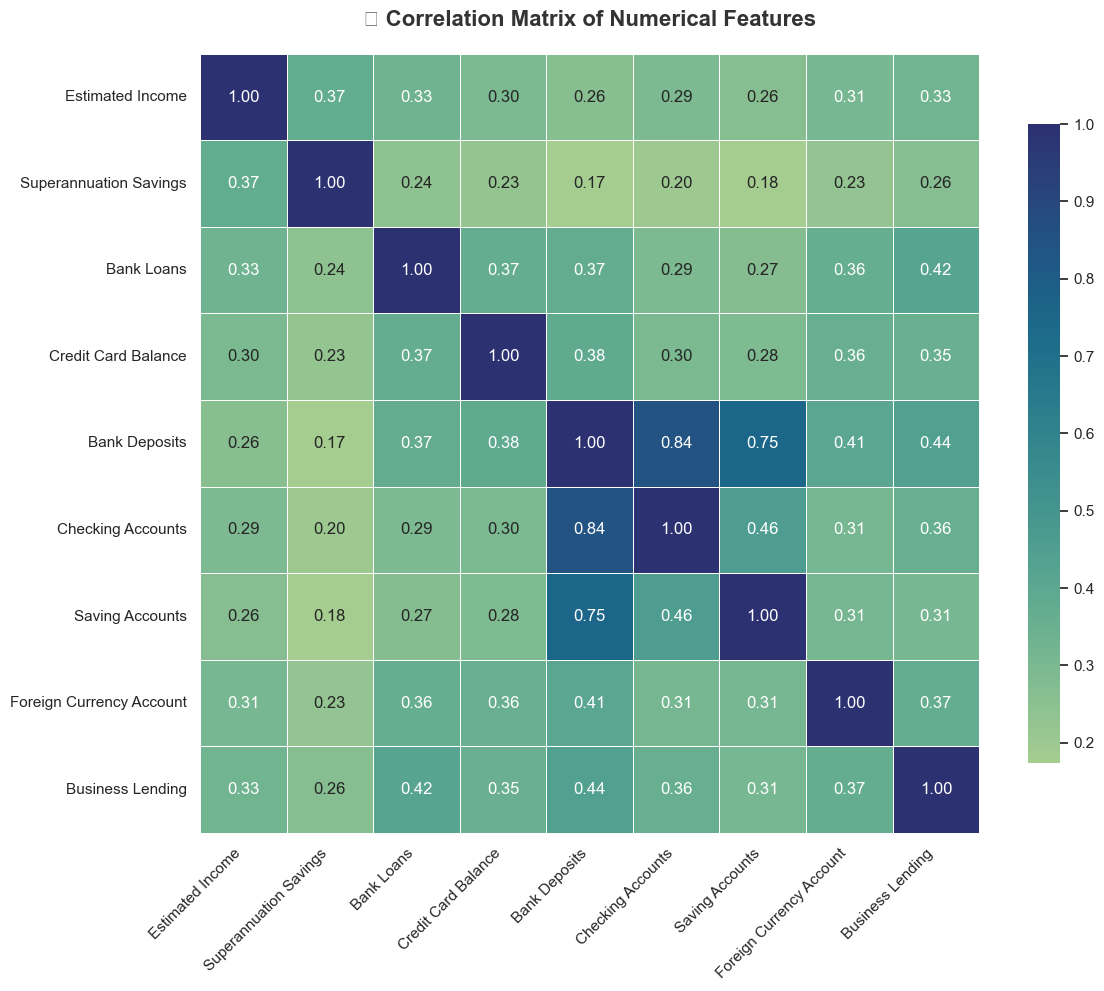

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = [
    'Estimated Income', 'Superannuation Savings', 'Bank Loans', 'Credit Card Balance',
    'Bank Deposits', 'Checking Accounts', 'Saving Accounts', 'Foreign Currency Account',
    'Business Lending'
]

# Calculate correlation matrix
correlation_matrix = df[numerical_cols].corr()

# Set figure size properly
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='crest', fmt=".2f", square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title("🔗 Correlation Matrix of Numerical Features", fontsize=16, fontweight='bold', color='#333', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


## Insight EDA:

1. The strongest positive correlation occur among "Bank deposits" with "Checking Accounts" "Saving Account" and Forign currecnt account indicating a customer who maintain high balances in one account type often hold substantial amounts/funds across other accounts as we;